**SVM FROM Scratch in Python**

In [1]:
import numpy as npy

class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    self.learning_rate = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters

    self.w = None
    self.b = None

  def fit(self, X, y):
    n_sample, n_feature = X.shape

    y_ = npy.where(y <= 0, -1, 1)

    # init weight
    self.w = npy.zeros(n_feature)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (npy.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.learning_rate * (2 * self.lambda_param * self.w - npy.dot(x_i, y_[idx]))
          self.b -= self.learning_rate * y_[idx]

  def predixt(self, X):
    approx = npy.dot(X, self.w) - self.b

    return npy.sign(approx)

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=42)
y = npy.where(y == 0, -1, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SVM()
model.fit(X_train, y_train)
y_pred = model.predixt(X_test)

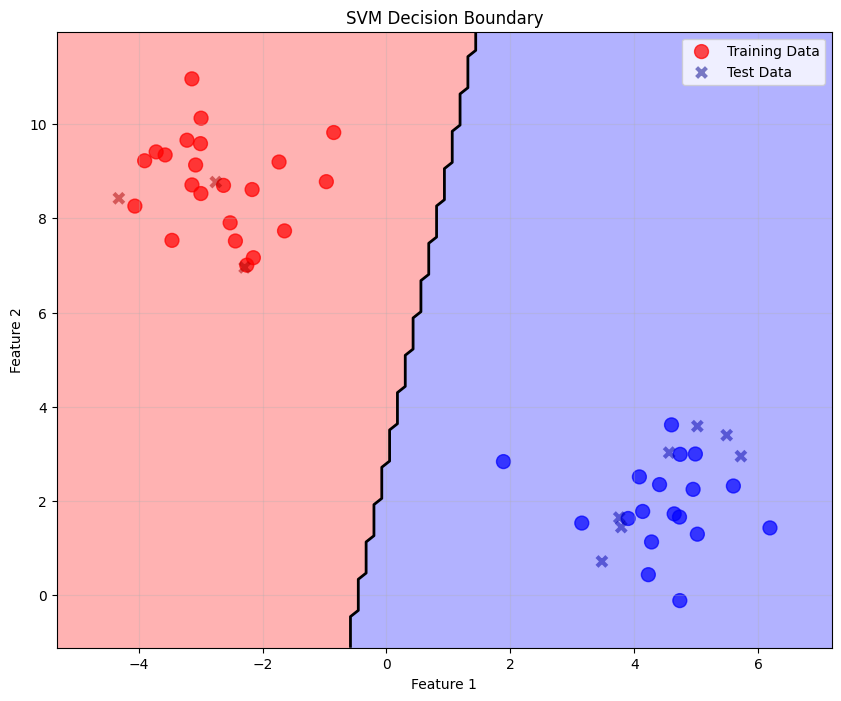

Test Accuracy: 100.00%


In [6]:
plt.figure(figsize=(10, 8))

colors = ['red' if y == -1 else 'blue' for y in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.7, s=100, label='Training Data')

# Plot test data
test_colors = ['darkred' if y == -1 else 'darkblue' for y in y_test]
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_colors, alpha=0.5, s=50, marker='x', linewidth=3, label='Test Data')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = npy.meshgrid(npy.linspace(x_min, x_max, 100), npy.linspace(y_min, y_max, 100))
Z = model.predixt(npy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.contour(xx, yy, Z, colors='black', linewidths=2, levels=[0])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")